<a href="https://colab.research.google.com/github/annsyj94/Data_Analytics_Portfolio/blob/main/16_%ED%8C%A8%EC%8A%A4%ED%8A%B8_%ED%91%B8%EB%93%9C_%EB%A7%88%EC%BC%80%ED%8C%85_%EC%BA%A0%ED%8E%98%EC%9D%B8_a_b_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패스트 푸드 마케팅 캠페인 A\B Test

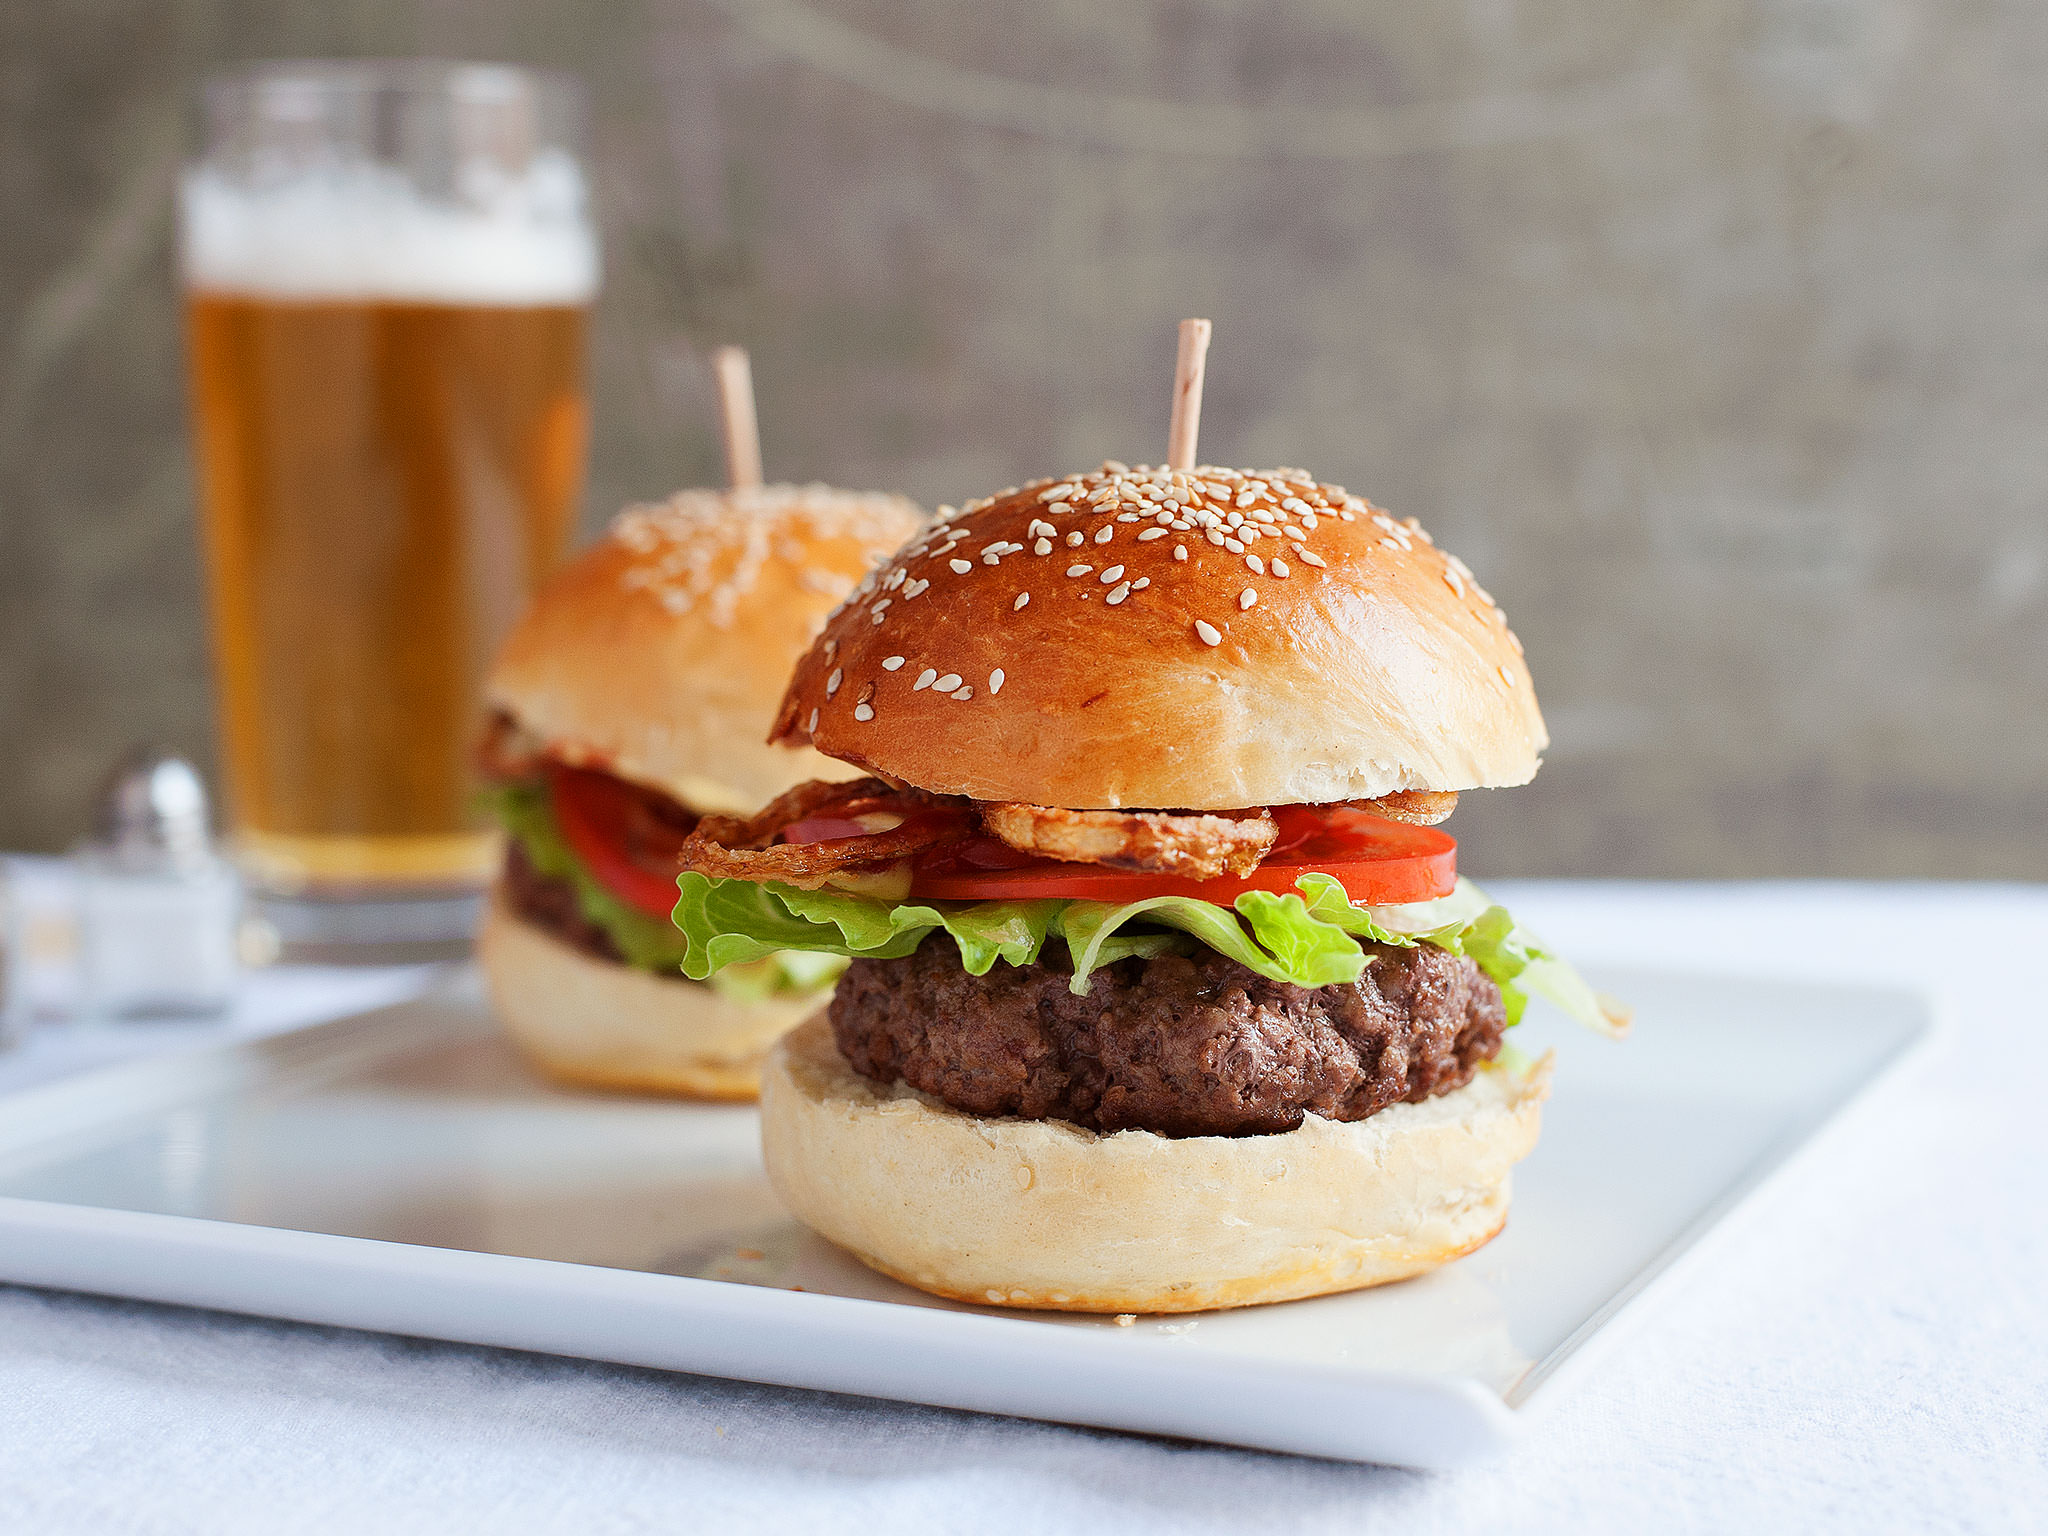

# 시나리오

패스트푸트 체인점은 메뉴에 새로운 아이템을 추가할 계획입니다. 그러나, 여전히 신제품을 홍보하기 위한 세 가지의 마케팅 캠페인 사이에서 결정되지 않았습니다. 

판매에 가장 큰 영향을 미치는 판촉을 판별하기 위해 새 항목이 무작위로 선택된 여러 시장의 위치에 소개됩니다.

각 위치에 다른 프로모션이 사용되며, 새로운 항목의 주간 판매는 처음 4추 동안 기록됩니다. 

# 목표
A/B 테스트 결과를 평가하고 난 다음에 가장 효과적인 마케팅 전략을 결정합니다.



In [ ]:
# 라이브러리 설치 
import pandas as pd
% matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
# 한국어 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 데이터 읽기 
df = pd.read_csv("/content/drive/MyDrive/hamburger.csv")
df.head(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [ ]:
# 패스트 푸드 마케팅 캠페인 데이터프레임 정보를 요약하여 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [ ]:
# 요소의 수 
df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

In [ ]:
#데이터 요약하기 
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [ ]:
# 그룹별 집계하기 
df2 = df.groupby(["Promotion", "MarketSize"]).count()["MarketID"]
df2 = pd.DataFrame(df2)
df2 = df2.reset_index()
df2.rename(columns = {"MarketID":"count"},inplace = True)

df2

,Promotion,MarketSize,count
0,1,Large,56
1,1,Medium,96
2,1,Small,20
3,2,Large,64
4,2,Medium,108
5,2,Small,16
6,3,Large,48
7,3,Medium,116
8,3,Small,24


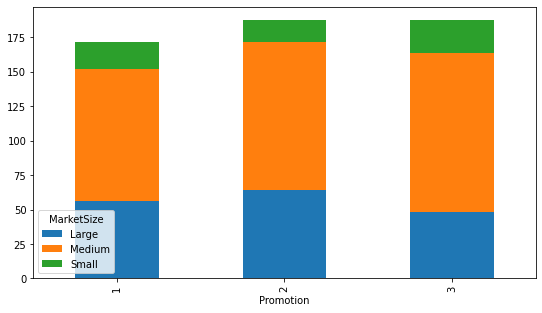

In [ ]:
# 누적 막대 그래프 그리기 
ax = df.groupby(["Promotion","MarketSize"]).count()["MarketID"].unstack("MarketSize")
ax.plot(kind = "bar", figsize = (9,5), stacked = True)

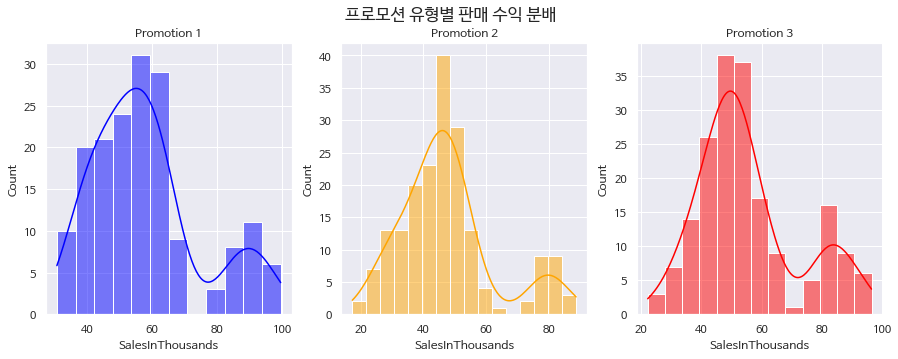

In [ ]:
# 세가지 프로모션의 이항분포 비교하기 
sns.set(font="NanumBarunGothic", rc={"axes.unicode_minus":False}) # 한국어 설정 

promo_1 = df.loc[df["Promotion"] == 1]
promo_2 = df.loc[df["Promotion"] == 2]
promo_3 = df.loc[df["Promotion"] == 3]

fig , axs = plt.subplots(1,3,figsize = (15,5))

sns.histplot(data=promo_1, x="SalesInThousands", kde=True, color="blue", ax=axs[0])
sns.histplot(data=promo_2, x="SalesInThousands", kde=True, color="orange", ax=axs[1])
sns.histplot(data=promo_3, x="SalesInThousands", kde=True, color="red", ax=axs[2])

axs[0].set_title ("Promotion 1")
axs[1].set_title("Promotion 2")
axs[2].set_title("Promotion 3")
fig.suptitle("프로모션 유형별 판매 수익 분배", fontsize = 17)
plt.show()


In [ ]:
#png으로 저장하기 
plt.savefig('fig1.png',dpi=300)

<Figure size 432x288 with 0 Axes>

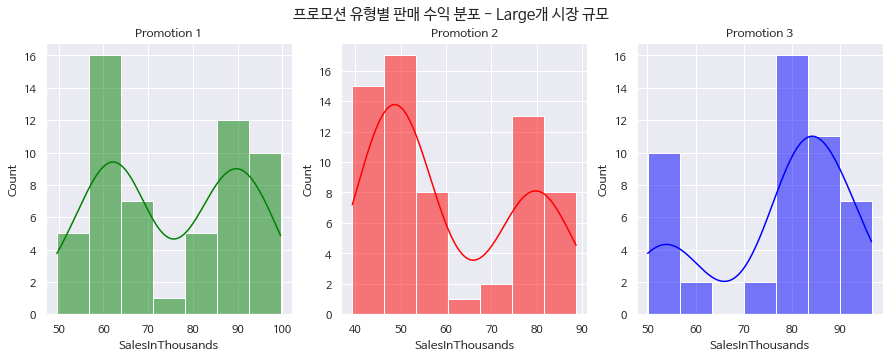

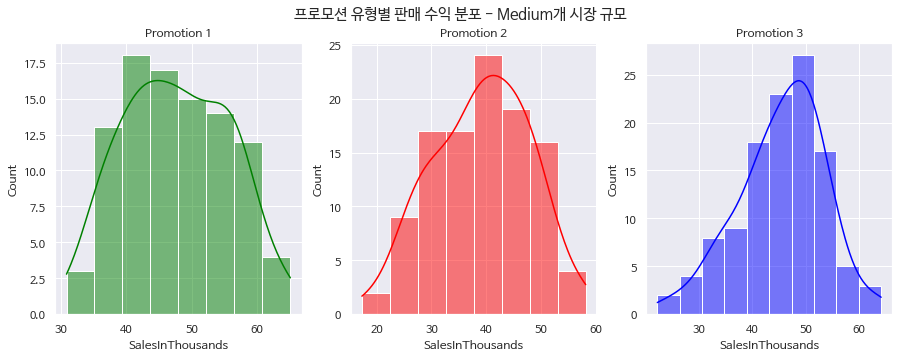

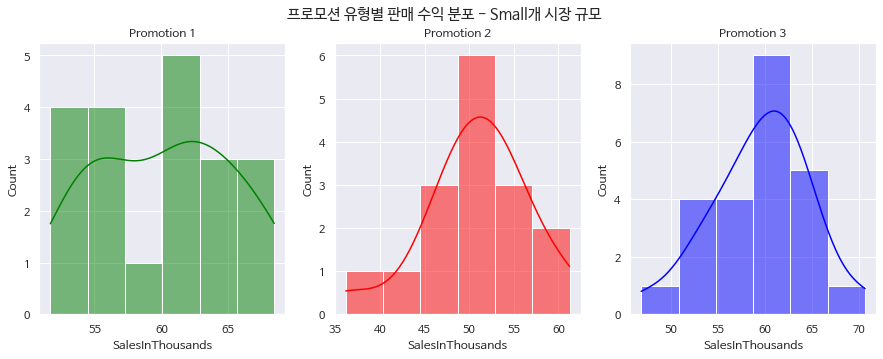

In [ ]:
# 프로모션 유형별 판매 수익 분포 
sizes = ["Large","Medium","Small"]

for size in sizes:
  temp = df.loc[df['MarketSize'] == size]
  promo1 = temp.loc[df.Promotion == 1]
  promo2 = temp.loc[df.Promotion == 2]
  promo3 = temp.loc[df.Promotion == 3]

  fig,axs = plt.subplots(1,3, figsize = (15,5))

  sns.histplot(data=promo1, x="SalesInThousands", kde=True, color="green", ax=axs[0])
  sns.histplot(data=promo2, x="SalesInThousands", kde=True, color="red", ax=axs[1])
  sns.histplot(data=promo3, x="SalesInThousands", kde=True, color="blue", ax=axs[2])

  axs[0].set_title("Promotion 1")
  axs[1].set_title("Promotion 2")
  axs[2].set_title("Promotion 3")
  fig.suptitle("프로모션 유형별 판매 수익 분포 - {}개 시장 규모".format(size), fontsize = 15)
  plt.show()

# A/B Test 

두 가지 유형의 프로모션 사이에는 통계적으로 유의하게 차이가 없습니다.

In [ ]:
 #SalesInThousands 요약하기 
 df.groupby("Promotion").describe()["SalesInThousands"]

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,58.099012,16.553782,30.81,46.3525,55.385,63.6175,99.65
2,188.0,47.329415,15.108955,17.34,38.1700,45.385,51.7450,88.64
3,188.0,55.364468,16.766231,22.18,44.1975,51.165,61.7325,96.48


In [ ]:
from scipy.stats import ttest_ind
from scipy import stats 
import numpy as np 
from scipy.stats import binom

# 프로모션 1하고 프로모션 2 비교하기 
promotion_1 = df[df["Promotion"] == 1]
promotion_2 = df[df["Promotion"]== 2]

p1_vs_p2 = ttest_ind(promotion_1["SalesInThousands"], promotion_2["SalesInThousands"])
print(p1_vs_p2)

Ttest_indResult(statistic=6.453671702181005, pvalue=3.5506696512134566e-10)


# 프로모션1과 프로모션 2 결과

p- 값은 임계 값 0.05보다 훨씬 낮습니다. 즉 귀무 가설을 기각할 수 있으며 두 가지 프로모션 유형간에 통계적 차이가 있음을 의미합니다.

t-검정 결과 그룹 간에 유의한 차이가 있으며 프로모션 1은 프로모션 2보다 더 많은 매출을 발생시키는 것으로 나타났습니다.

In [ ]:
# 프로모션 1하고 프로모션 3 비교하기 

promotion_1 = df[df.Promotion == 1]
promotion_3 = df[df.Promotion ==  3]

p1_vs_p3 = ttest_ind(promotion_1["SalesInThousands"], promotion_3["SalesInThousands"])
print(p1_vs_p3)

Ttest_indResult(statistic=1.5551383687293547, pvalue=0.12079667272313273)


# 프로모션1과 프로모션 3 결과

p-값이 임계값 0.05보다 훨씬 높으며, 이는 귀무 가설을 기각할 수 없으며 두 승격 유형 간에 통계적 차이가 없음을 의미합니다.

In [ ]:
# 프로모션 2 하고 프로모션 3 비교하기 
promotion_2 = df[df.Promotion == 2]
promotion_3 = df[df.Promotion ==  3]

p2_vs_p3 = ttest_ind(promotion_2["SalesInThousands"], promotion_3["SalesInThousands"])
print(p2_vs_p3)


Ttest_indResult(statistic=-4.88139271089348, pvalue=1.562894303627738e-06)


# 프로모션 2와 프로모션 3의 결과
p-값이 임계값 0.05보다 낮습니다. 즉, 귀무 가설을 기각할 수 있고 두 승격 유형 사이에 통계적 차이가 있음을 의미합니다.



# 결과

프로모션 1과 프로모션 3 모두 프로모션 2를 능가하지만 프로모션 1과 프로모션 3의 차이는 통계적으로 차이가 없습니다.,따라서 회사는 프로모션 1 또는 3 중 하나를 사용할 수 있습니다.